<a href="https://colab.research.google.com/github/B-Sujith-Kumar/CytoAutoCluster/blob/main/CytoAutoCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Levine_32dim.fcs.csv')
df.head(10)

,Event,Time,Cell_length,DNA1,DNA2,CD45RA,CD133,CD19,CD22,CD11b,...,CD117,CD49d,HLA-DR,CD64,CD41,Viability,file_number,event_number,label,individual
0,1,2693.0,22,4.391057,4.617262,0.162691,-0.029585,-0.006696,0.066388,-0.009184,...,0.053050,0.853505,1.664480,-0.005376,-0.001961,0.648429,3.627711,307,1.0,1
1,2,3736.0,35,4.340481,4.816692,0.701349,-0.038280,-0.016654,0.074409,0.808031,...,0.089660,0.197818,0.491592,0.144814,0.868014,0.561384,3.627711,545,1.0,1
2,3,7015.0,32,3.838727,4.386369,0.603568,-0.032216,0.073855,-0.042977,-0.001881,...,0.046222,2.586670,1.308337,-0.010961,-0.010413,0.643337,3.627711,1726,1.0,1
3,4,7099.0,29,4.255806,4.830048,0.433747,-0.027611,-0.017661,-0.044072,0.733698,...,0.066470,1.338669,0.140523,-0.013449,-0.026039,-0.026523,3.627711,1766,1.0,1
4,5,7700.0,25,3.976909,4.506433,-0.008809,-0.030297,0.080423,0.495791,1.107627,...,-0.006223,0.180924,0.197332,0.076167,-0.040488,0.283287,3.627711,2031,1.0,1
5,6,8333.0,28,3.967840,4.870732,0.228084,-0.029500,-0.000359,-0.029950,0.301333,...,-0.043678,0.392315,0.195945,0.106496,-0.004606,-0.013334,3.627711,2300,1.0,1
6,7,8981.0,23,4.390551,5.106709,0.842104,0.025615,0.019580,-0.024184,1.184546,...,-0.016554,0.063117,0.374203,-0.017290,0.936918,-0.021216,3.627711,2589,1.0,1
7,8,9363.0,24,4.160224,4.850743,0.052533,0.019060,0.075496,0.051154,1.561128,...,-0.008631,0.290855,0.008078,-0.033023,0.356086,0.618822,3.627711,2793,1.0,1
8,9,9499.0,25,4.411616,4.951264,-0.036765,-0.044830,-0.018134,0.307849,0.896151,...,0.054051,0.327715,-0.021343,-0.025520,0.339286,0.354717,3.627711,2861,1.0,1
9,10,9679.0,26,3.825704,4.576377,0.111218,-0.019867,-0.009652,-0.008390,0.033299,...,-0.026864,1.908098,1.240179,0.232267,0.085490,0.080203,3.627711,2947,1.0,1


In [4]:
df.columns

Index(['Event', 'Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133',
       'CD19', 'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4',
       'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c',
       'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117',
       'CD49d', 'HLA-DR', 'CD64', 'CD41', 'Viability', 'file_number',
       'event_number', 'label', 'individual'],
      dtype='object')

In [5]:
df.shape

(265627, 42)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265627 entries, 0 to 265626
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Event         265627 non-null  int64  
 1   Time          265627 non-null  float64
 2   Cell_length   265627 non-null  int64  
 3   DNA1          265627 non-null  float64
 4   DNA2          265627 non-null  float64
 5   CD45RA        265627 non-null  float64
 6   CD133         265627 non-null  float64
 7   CD19          265627 non-null  float64
 8   CD22          265627 non-null  float64
 9   CD11b         265627 non-null  float64
 10  CD4           265627 non-null  float64
 11  CD8           265627 non-null  float64
 12  CD34          265627 non-null  float64
 13  Flt3          265627 non-null  float64
 14  CD20          265627 non-null  float64
 15  CXCR4         265627 non-null  float64
 16  CD235ab       265627 non-null  float64
 17  CD45          265627 non-null  float64
 18  CD12

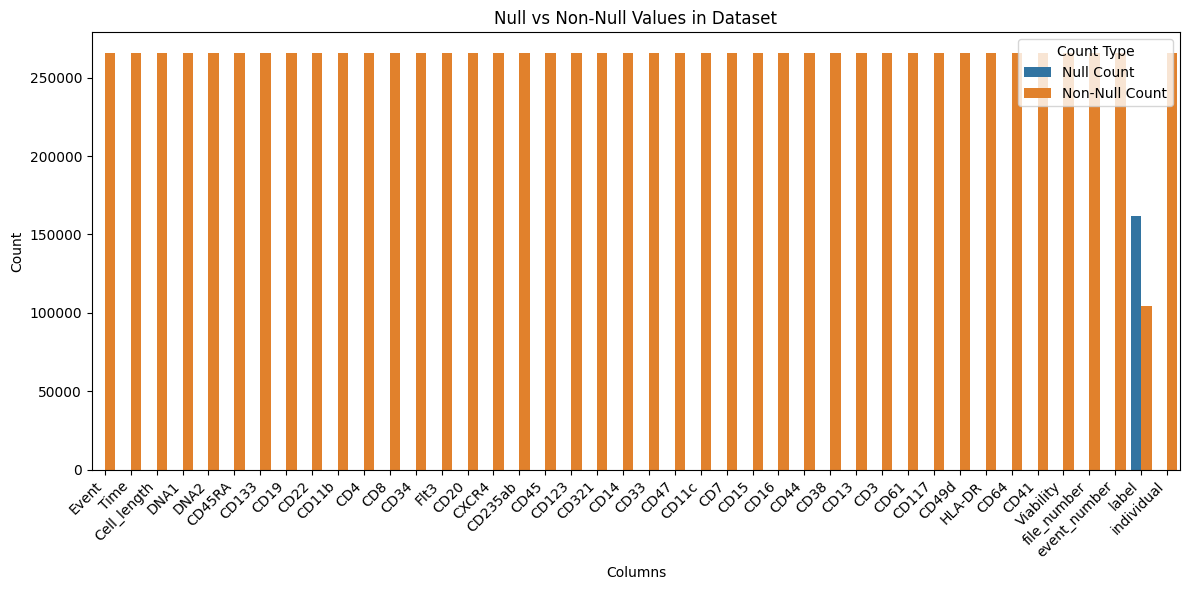

In [7]:
null_counts = df.isnull().sum()
non_null_counts = df.notnull().sum()

null_data = pd.DataFrame({
    'Column': df.columns,
    'Null Count': null_counts,
    'Non-Null Count': non_null_counts
})

null_data_melted = null_data.melt(id_vars='Column', var_name='Count Type', value_name='Count')

plt.figure(figsize=(12, 6))

sns.barplot(data=null_data_melted, x='Column', y='Count', hue='Count Type')

plt.xticks(rotation=45, ha='right')
plt.title('Null vs Non-Null Values in Dataset')
plt.ylabel('Count')
plt.xlabel('Columns')
plt.legend(title='Count Type')
plt.tight_layout()
plt.show()

In [8]:
df = df.drop(['Event', 'Time', 'file_number', 'event_number', 'individual'], axis=1)

In [9]:
label_distribution = df['label'].value_counts(dropna=False)
print("Class Label Distribution:")
print(label_distribution)

Class Label Distribution:
label
NaN     161443
7.0      26366
10.0     21099
8.0      20108
9.0      16520
13.0      6135
2.0       3905
4.0       3295
3.0       2248
11.0      1238
1.0       1207
6.0        916
14.0       513
12.0       330
5.0        304
Name: count, dtype: int64


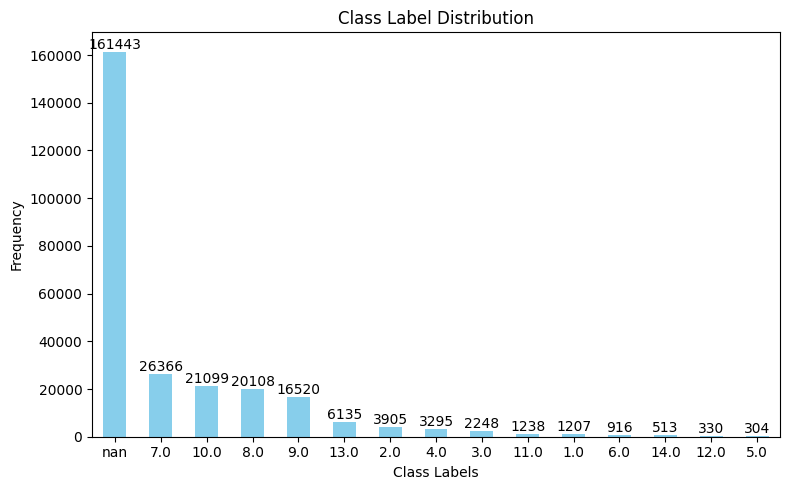

In [10]:
label_distribution = df['label'].value_counts(dropna=False)

plt.figure(figsize=(8, 5))
bars = label_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Label Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

for bar in bars.patches:
    bars.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center',
                  va='bottom')

plt.tight_layout()
plt.show()

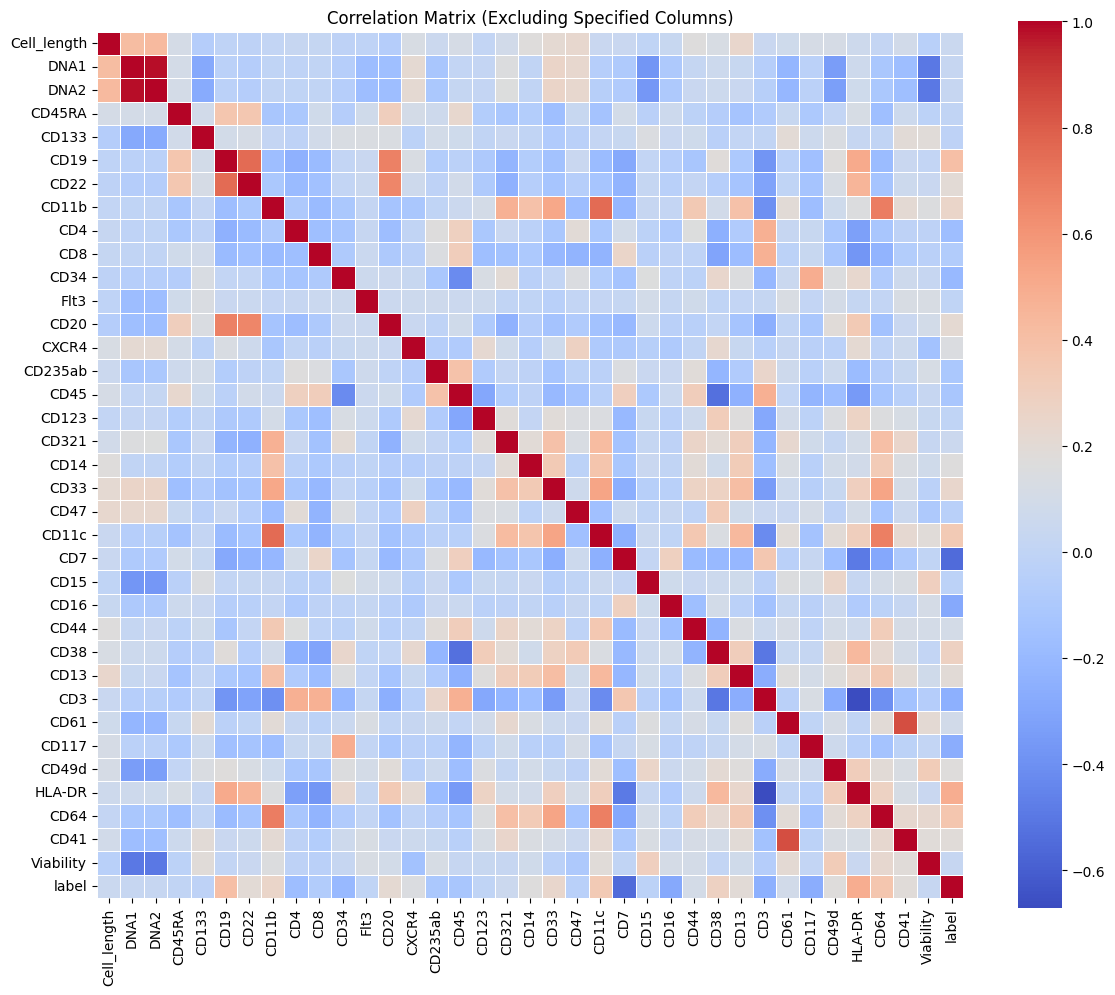

In [11]:
filtered_df = df

correlation_matrix = filtered_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, cbar=True, fmt='', linewidths=0.5)
plt.title('Correlation Matrix (Excluding Specified Columns)')
plt.tight_layout()
plt.show()

In [12]:
corr_matrix = df.corr()

corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

top_5_corr_pairs = corr_pairs.head(10)

print("Top 10 correlated column pairs:")
for (col1, col2), corr_value in top_5_corr_pairs.items():
    print(f"{col1} and {col2}: Correlation = {corr_value:.2f}")

Top 10 correlated column pairs:
DNA2 and DNA1: Correlation = 0.98
DNA1 and DNA2: Correlation = 0.98
CD61 and CD41: Correlation = 0.84
CD41 and CD61: Correlation = 0.84
CD22 and CD19: Correlation = 0.75
CD19 and CD22: Correlation = 0.75
CD11b and CD11c: Correlation = 0.75
CD11c and CD11b: Correlation = 0.75
CD64 and CD11b: Correlation = 0.69
CD11b and CD64: Correlation = 0.69


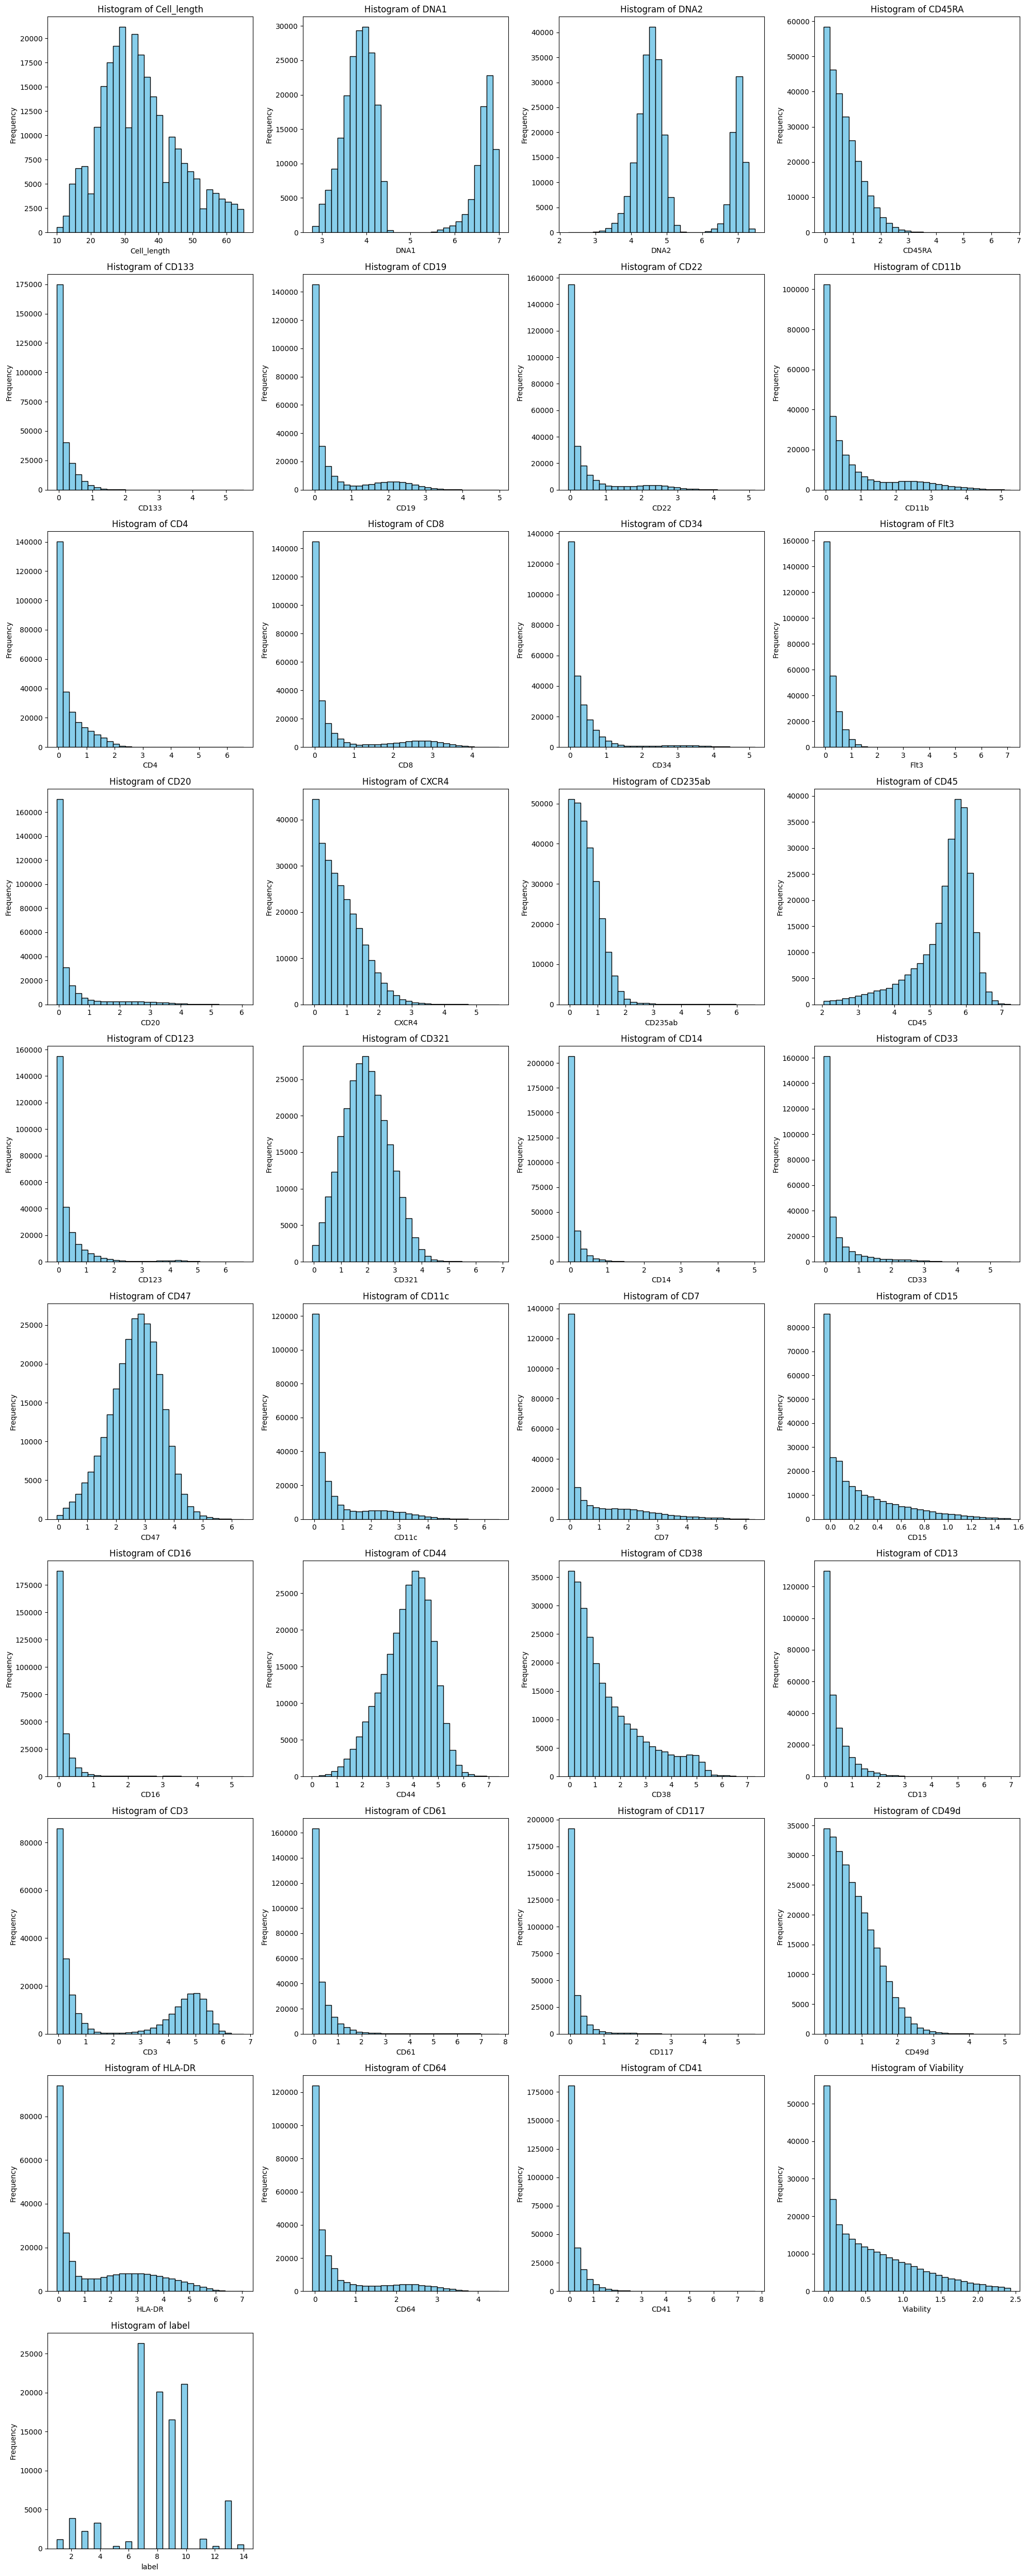

In [13]:
columns_to_exclude = ['Event', 'Time', 'file_number', 'event_number', 'individual']
columns_to_plot = [col for col in df.columns if col not in columns_to_exclude]

num_cols = 4
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 5))

for i, column in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

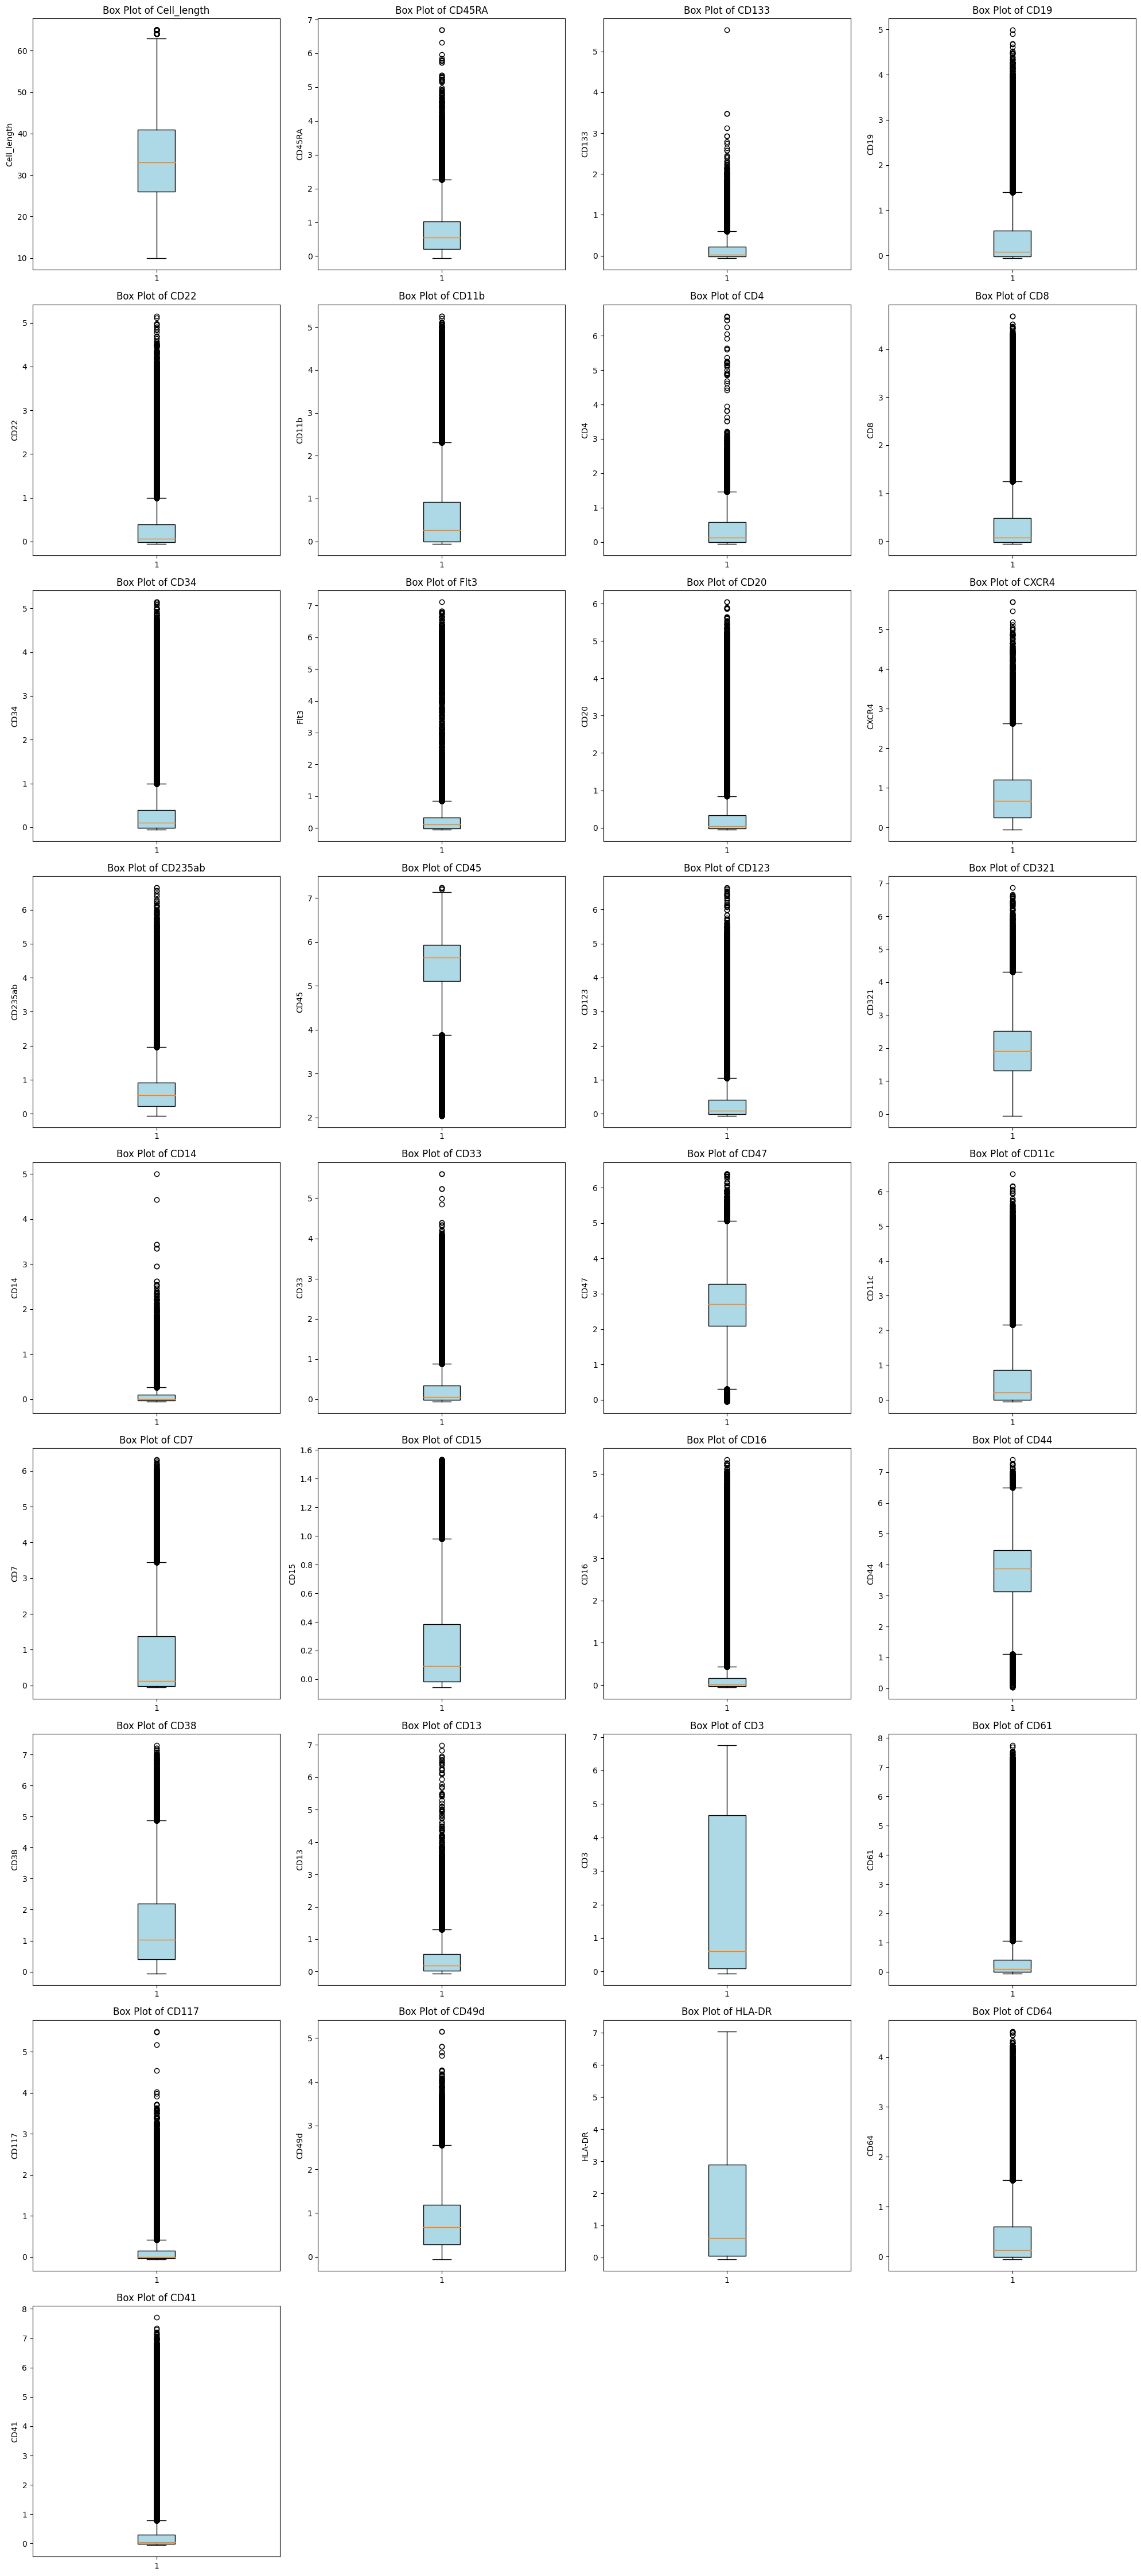

In [14]:
columns_to_exclude = ['Event', 'DNA1', 'DNA2', 'Time', 'file_number', 'event_number', 'Viability', 'label']
columns_to_plot = [col for col in df.columns if col not in columns_to_exclude]

num_cols = 4
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 5))

for i, column in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.boxplot(df[column], patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

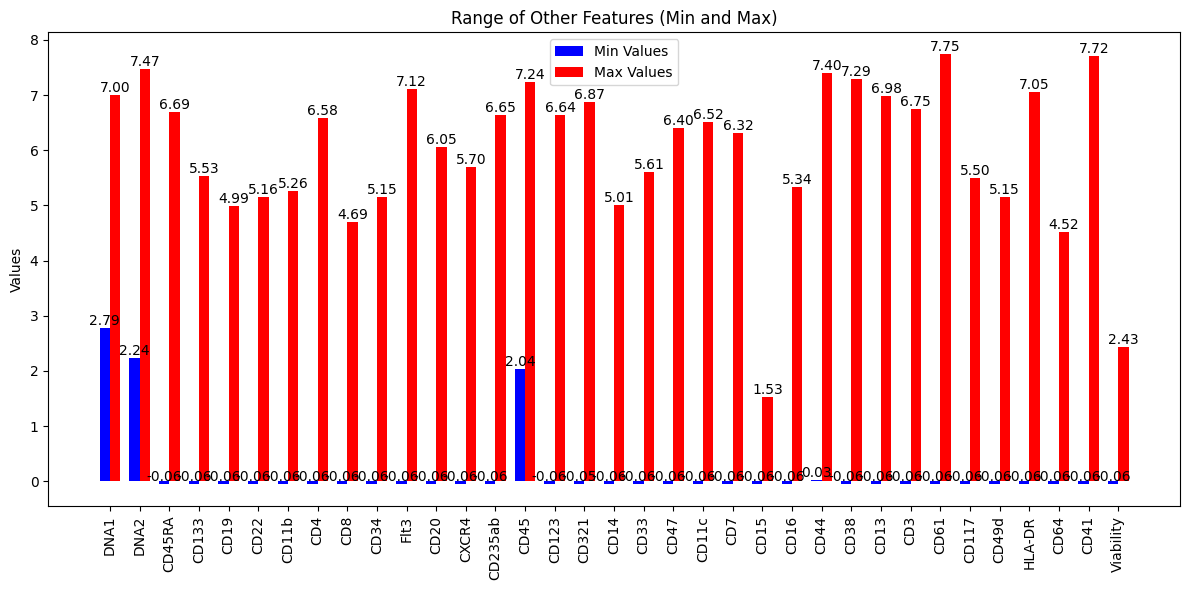

In [15]:
import numpy as np
import matplotlib.pyplot as plt

high_value_columns = ['Time', 'Event', 'event_number', 'label', 'Cell_length', 'file_number']
other_columns = [col for col in df.columns if col not in high_value_columns]

min_values_other = df[other_columns].min()
max_values_other = df[other_columns].max()

fig, ax = plt.subplots(figsize=(12, 6))

x_other = np.arange(len(other_columns))
width = 0.35

bars_min_other = ax.bar(x_other - width/2, min_values_other, width, label='Min Values', color='b')
bars_max_other = ax.bar(x_other + width/2, max_values_other, width, label='Max Values', color='r')

ax.set_ylabel('Values')
ax.set_title('Range of Other Features (Min and Max)')
ax.set_xticks(x_other)
ax.set_xticklabels(other_columns, rotation=90)
ax.legend()

for bar in bars_min_other:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

for bar in bars_max_other:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


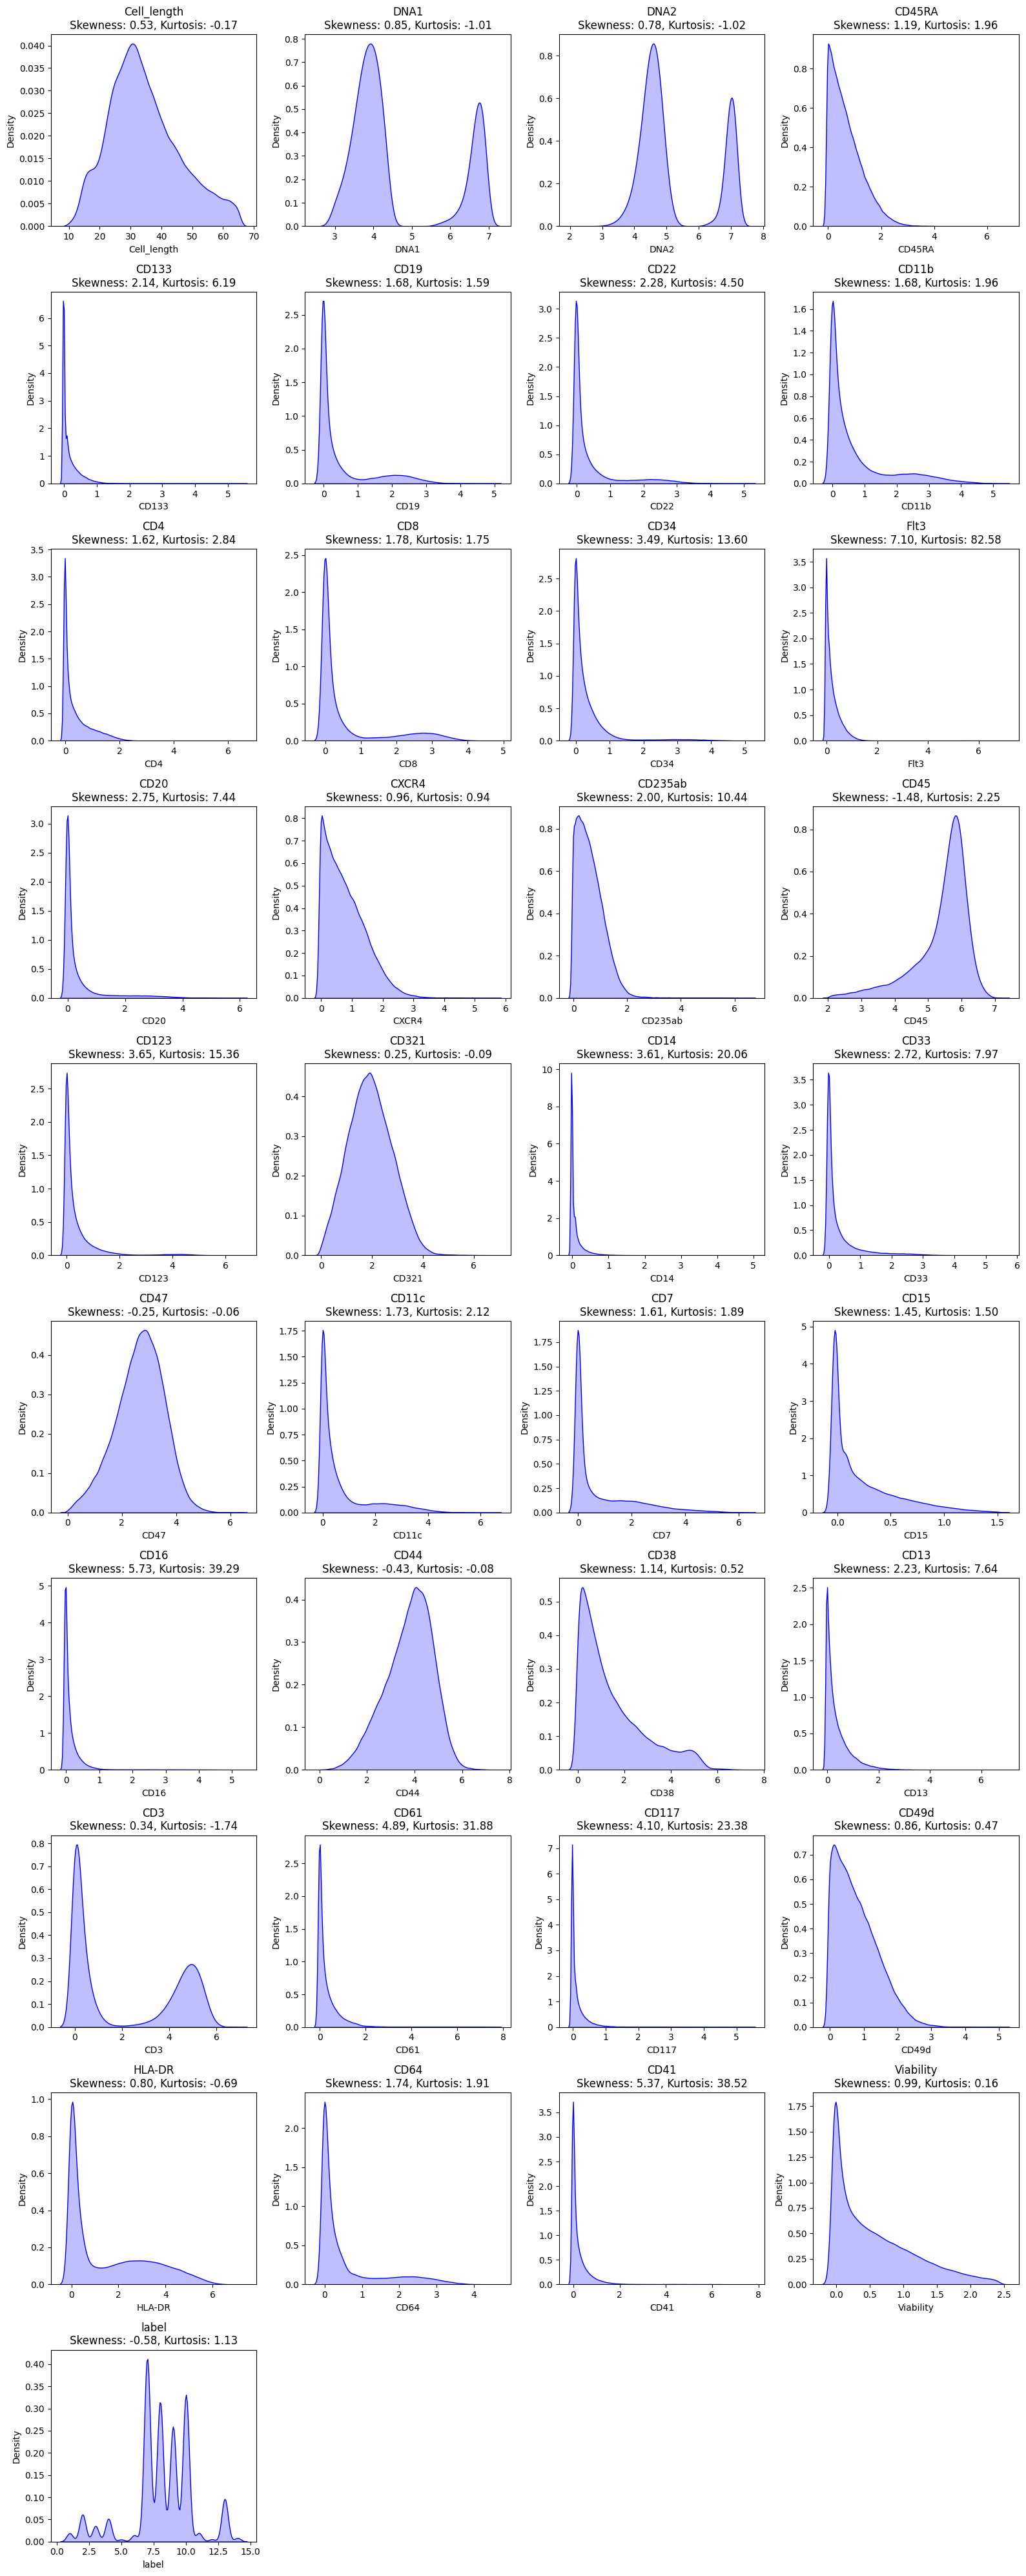

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import numpy as np

excluded_columns = ['Event', 'event_time', 'file_number', 'event_number']
relevant_columns = [col for col in df.columns if col not in excluded_columns]

num_rows = int(np.ceil(len(relevant_columns) / num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

axs = axs.flatten()

for i, col in enumerate(relevant_columns):
    sns.kdeplot(df[col], ax=axs[i], fill=True, color='blue')

    skewness_value = skew(df[col].dropna())
    kurtosis_value = kurtosis(df[col].dropna())

    axs[i].set_title(f'{col}\nSkewness: {skewness_value:.2f}, Kurtosis: {kurtosis_value:.2f}')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


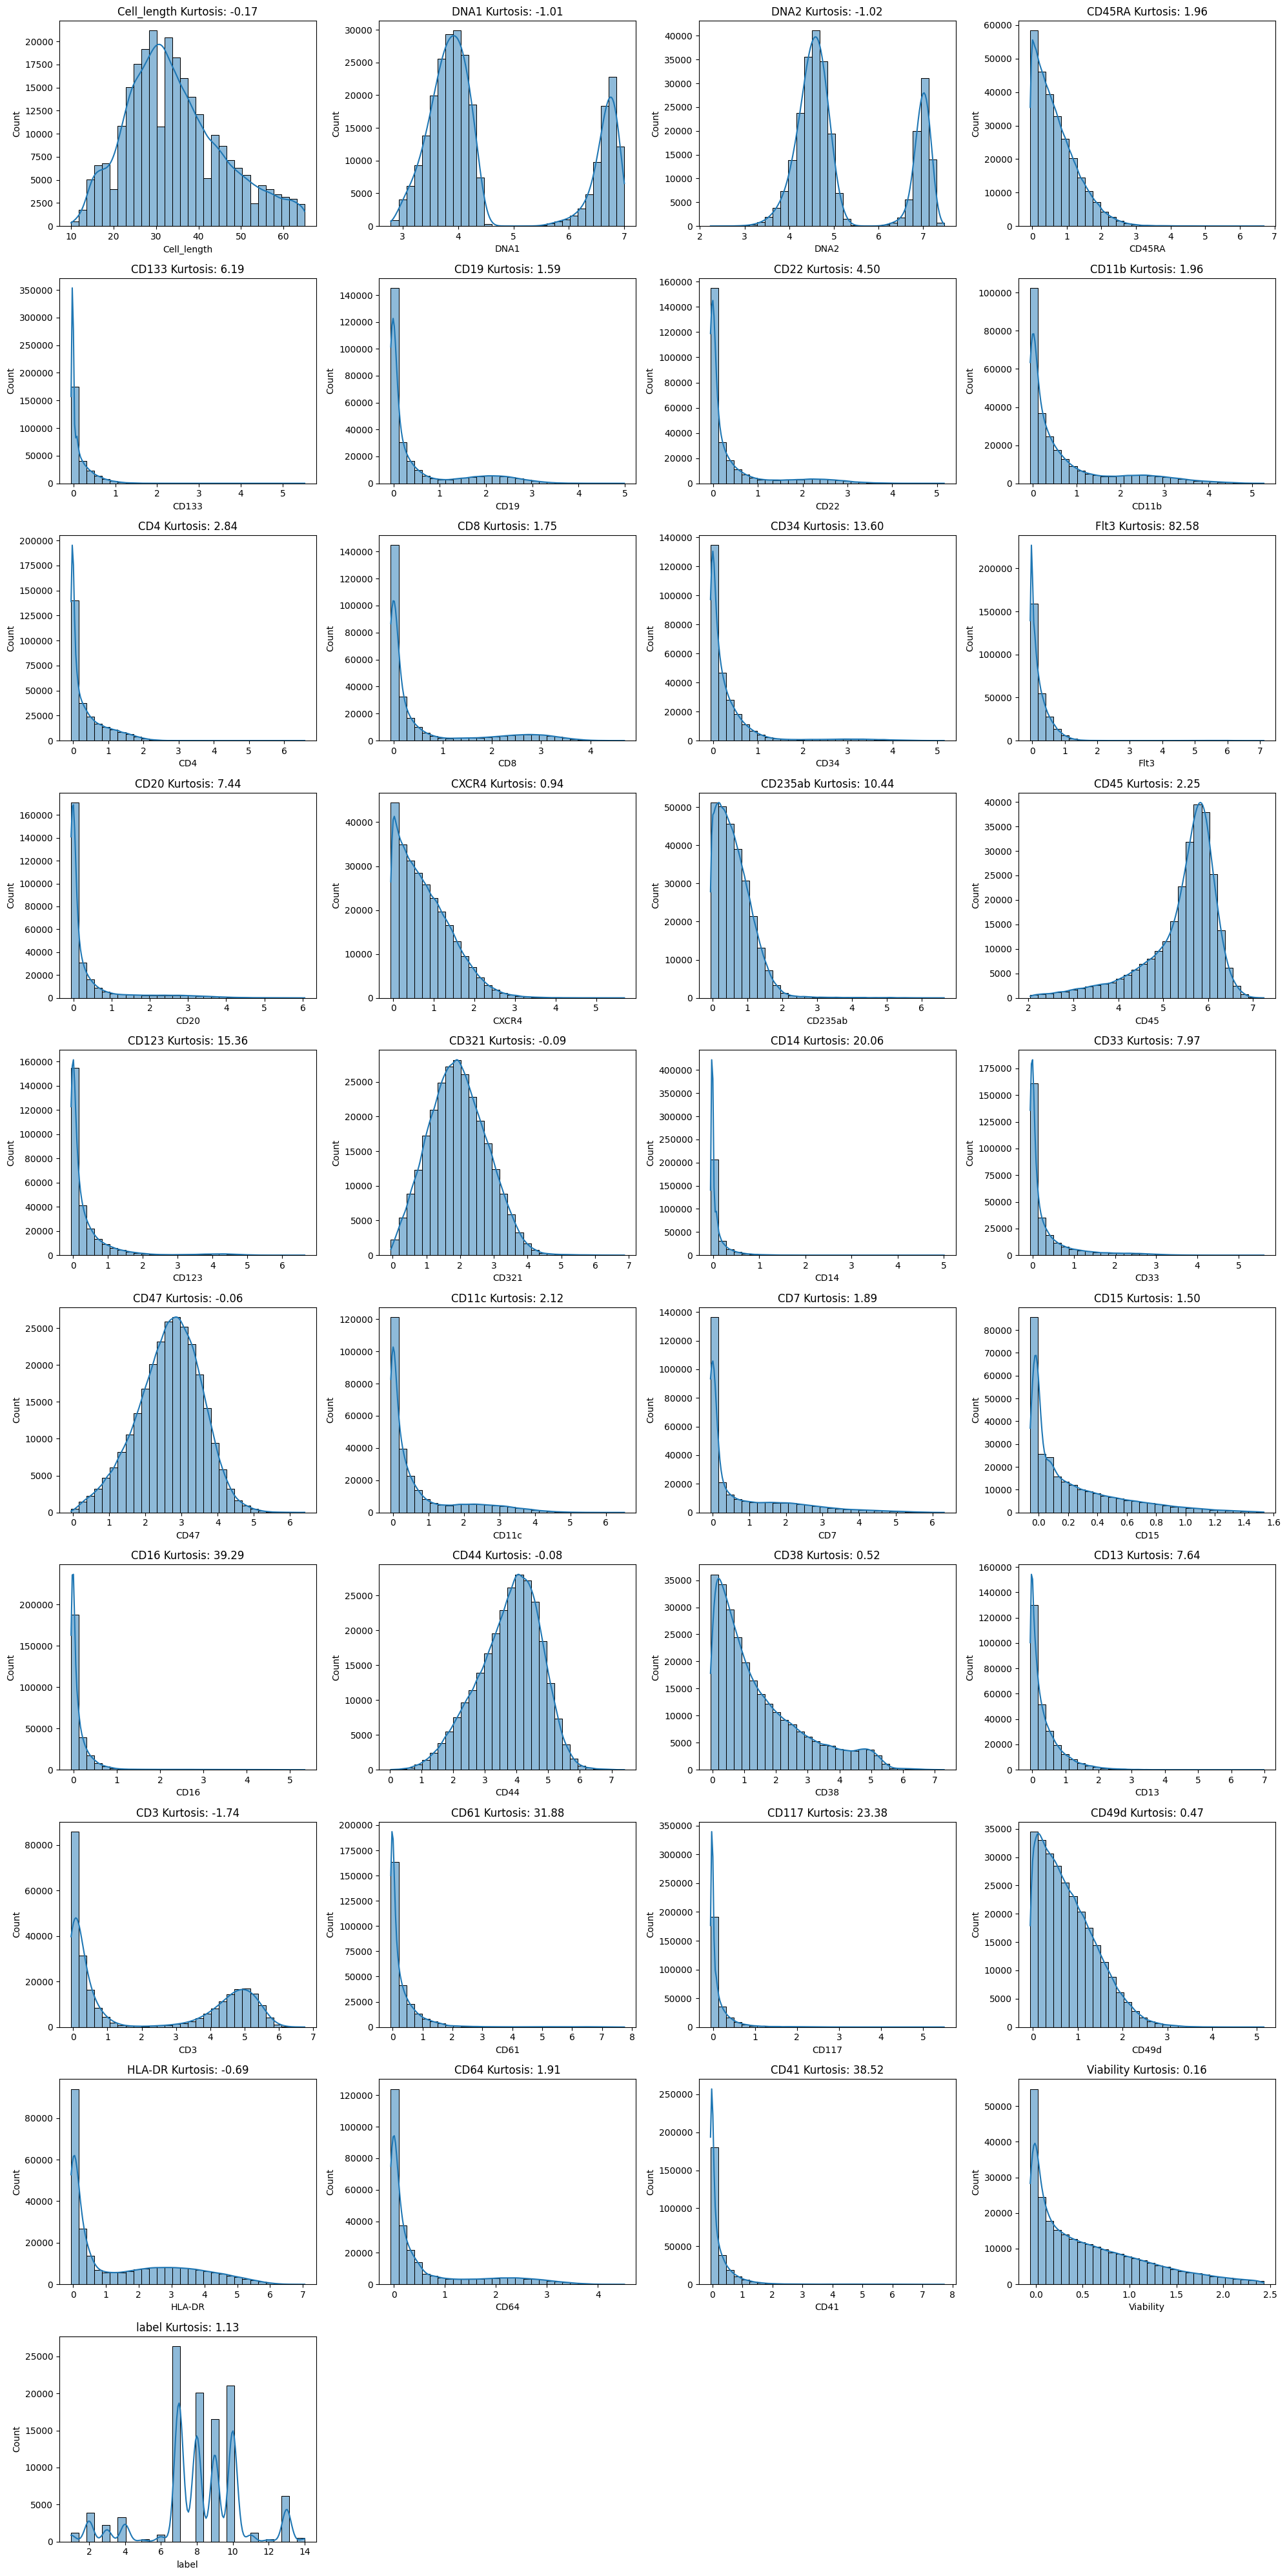

In [17]:
excluded_columns = ['Event', 'event_time', 'file_number', 'event_number']
relevant_columns = [col for col in df.columns if col not in excluded_columns]

num_cols = 4
num_rows = (len(relevant_columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(relevant_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'{col} Kurtosis: {kurtosis(df[col].dropna()):.2f}')

# Adjust layout and remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

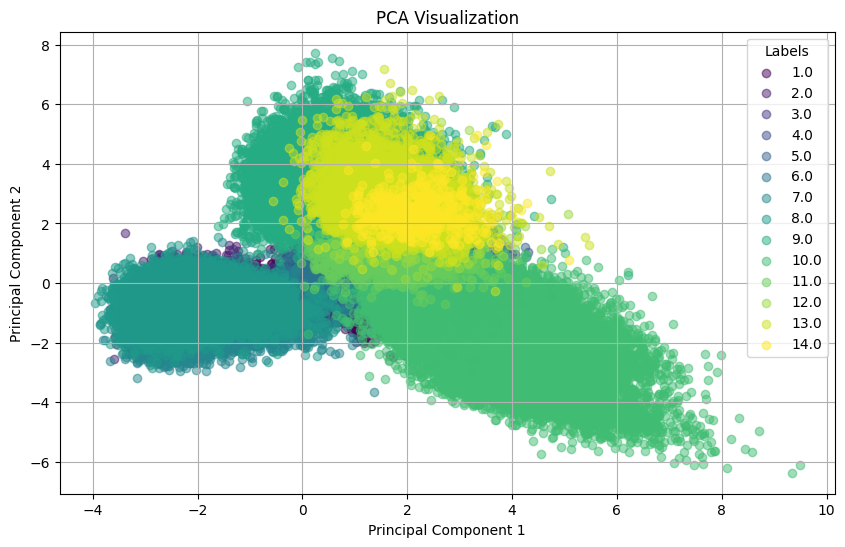

Explained variance by component: [0.16341505 0.1125217 ]


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

excluded_columns = ['Event', 'event_time', 'file_number', 'event_number']
relevant_columns = [col for col in df.columns if col not in excluded_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[relevant_columns].dropna())

pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_results, columns=['Principal Component 1', 'Principal Component 2'])

pca_df['Label'] = df['label'].dropna().values

plt.figure(figsize=(10, 6))
unique_labels = pca_df['Label'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    subset = pca_df[pca_df['Label'] == label]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'],
                alpha=0.5, color=colors[i], label=label)

plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.legend(title='Labels')
plt.show()

explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by component: {explained_variance}')


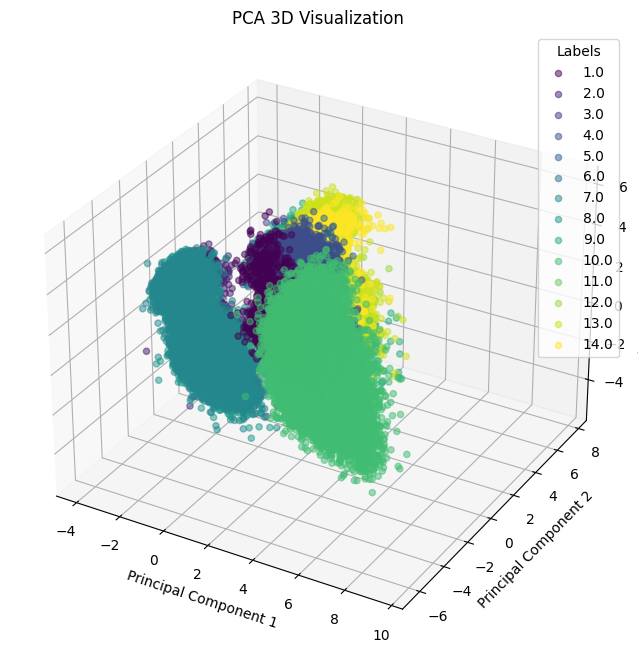

Explained variance by component: [0.16341505 0.1125217  0.10128376]


In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[relevant_columns].dropna())

pca = PCA(n_components=3)
pca_results = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_results, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
pca_df['Label'] = df['label'].dropna().values

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

unique_labels = pca_df['Label'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    subset = pca_df[pca_df['Label'] == label]
    ax.scatter(subset['Principal Component 1'], subset['Principal Component 2'], subset['Principal Component 3'],
               alpha=0.5, color=colors[i], label=label)

ax.set_title('PCA 3D Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(title='Labels')
plt.show()

explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by component: {explained_variance}')


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 104184 samples in 0.030s...
[t-SNE] Computed neighbors for 104184 samples in 86.819s...
[t-SNE] Computed conditional probabilities for sample 1000 / 104184
[t-SNE] Computed conditional probabilities for sample 2000 / 104184
[t-SNE] Computed conditional probabilities for sample 3000 / 104184
[t-SNE] Computed conditional probabilities for sample 4000 / 104184
[t-SNE] Computed conditional probabilities for sample 5000 / 104184
[t-SNE] Computed conditional probabilities for sample 6000 / 104184
[t-SNE] Computed conditional probabilities for sample 7000 / 104184
[t-SNE] Computed conditional probabilities for sample 8000 / 104184
[t-SNE] Computed conditional probabilities for sample 9000 / 104184
[t-SNE] Computed conditional probabilities for sample 10000 / 104184
[t-SNE] Computed conditional probabilities for sample 11000 / 104184
[t-SNE] Computed conditional probabilities for sample 12000 / 104184
[t-SNE] Computed conditional probab

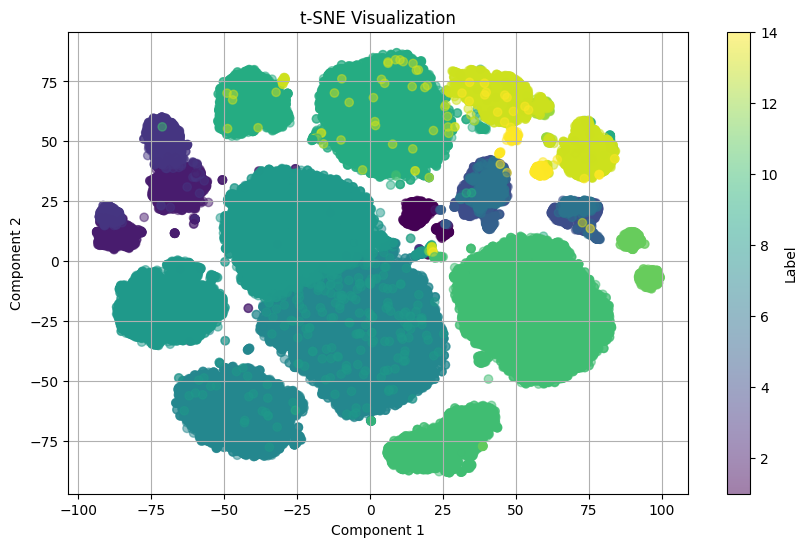

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[relevant_columns].dropna())

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, verbose=1)
tsne_results = tsne.fit_transform(scaled_data)

tsne_df = pd.DataFrame(tsne_results, columns=['Component 1', 'Component 2'])
tsne_df['Label'] = df['label'].dropna().values

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    tsne_df['Component 1'],
    tsne_df['Component 2'],
    c=tsne_df['Label'],
    cmap='viridis',
    alpha=0.5
)
plt.title('t-SNE Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()
plt.colorbar(scatter, label='Label')
plt.show()


In [24]:
import numpy as np
import pandas as pd

p_m = 0.5

mask = np.random.binomial(1, p_m, df.shape)

masked_data = df * mask

print(masked_data.head())

   Cell_length  DNA1      DNA2    CD45RA     CD133      CD19      CD22  \
0            0   0.0  0.000000  0.000000 -0.000000 -0.000000  0.000000   
1            0   0.0  4.816692  0.000000 -0.038280 -0.000000  0.000000   
2           32   0.0  4.386369  0.603568 -0.000000  0.000000 -0.000000   
3            0   0.0  0.000000  0.000000 -0.027611 -0.017661 -0.044072   
4            0   0.0  0.000000 -0.000000 -0.000000  0.000000  0.000000   

      CD11b       CD4       CD8  ...      CD13       CD3      CD61    CD117  \
0 -0.009184  0.363602  0.520195  ...  0.000000 -0.000000 -0.002936  0.00000   
1  0.000000 -0.035424 -0.000000  ...  1.457326 -0.043466  0.000000  0.08966   
2 -0.001881 -0.008781 -0.005632  ...  0.213583  0.000000  0.257137  0.00000   
3  0.733698 -0.000000  0.000000  ...  0.000000  0.060443 -0.041140  0.00000   
4  1.107627  0.000000  0.031310  ...  0.000000  0.000000  0.168609 -0.00000   

      CD49d    HLA-DR      CD64      CD41  Viability  label  
0  0.853505  1.664

In [25]:
import pandas as pd
import numpy as np

np.random.seed(42)
demodata = pd.DataFrame({
    'column1': [5, 12, 18, 7],
    'column2': [10, 20, 15, 30],
    'column3': [8, 25, 35, 40]
})

shuffled_demodata = demodata.apply(np.random.permutation)

print("Original DataFrame (demodata):\n", demodata)
print("\nShuffled DataFrame (shuffled_demodata):\n", shuffled_demodata)

Original DataFrame (demodata):
    column1  column2  column3
0        5       10        8
1       12       20       25
2       18       15       35
3        7       30       40

Shuffled DataFrame (shuffled_demodata):
    column1  column2  column3
0       12       20       40
1        7       30        8
2        5       10       25
3       18       15       35


In [26]:
import pandas as pd
import numpy as np

np.random.seed(42)
demodata = pd.DataFrame({
    'column1': [5, 12, 18, 7],
    'column2': [10, 20, 15, 30],
    'column3': [8, 25, 35, 40]
})

shuffled_demodata = demodata.apply(np.random.permutation)

m = 0.3

demodata_corrupted = demodata * (1 - m) + shuffled_demodata * m

print("Original DataFrame (demodata):\n", demodata)
print("\nShuffled DataFrame (shuffled_demodata):\n", shuffled_demodata)
print("\nCorrupted DataFrame (demodata_corrupted):\n", demodata_corrupted)


Original DataFrame (demodata):
    column1  column2  column3
0        5       10        8
1       12       20       25
2       18       15       35
3        7       30       40

Shuffled DataFrame (shuffled_demodata):
    column1  column2  column3
0       12       20       40
1        7       30        8
2        5       10       25
3       18       15       35

Corrupted DataFrame (demodata_corrupted):
    column1  column2  column3
0      7.1     13.0     17.6
1     10.5     23.0     19.9
2     14.1     13.5     32.0
3     10.3     25.5     38.5
